In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = pd.read_csv('data.txt', sep=",", header = None, names = ["Size", "Bedrooms", "Price"])
dataset = dataset.to_numpy()


In [5]:
features_X = dataset[:, :-1]
target_y = dataset[:, -1:]

In [6]:
features_X.shape

(47, 2)

In [7]:
target_y.shape

(47, 1)

In [8]:
m = len(target_y)

In [11]:
#code is for normalization
def featureNormalize(X):
    mu = np.mean(features_X, axis = 0 )
    sigma = np.std(features_X, axis = 0)
    X_norm = (X - mu)/sigma
    return mu, sigma, X_norm
                 
mu, sigma, features_X = featureNormalize(features_X)
features_X = np.concatenate((np.ones((m, 1), dtype=np.int8), features_X), axis = 1)

In [12]:
features_X

array([[ 1.00000000e+00,  1.31415422e-01, -2.26093368e-01],
       [ 1.00000000e+00, -5.09640698e-01, -2.26093368e-01],
       [ 1.00000000e+00,  5.07908699e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.43677059e-01, -1.55439190e+00],
       [ 1.00000000e+00,  1.27107075e+00,  1.10220517e+00],
       [ 1.00000000e+00, -1.99450507e-02,  1.10220517e+00],
       [ 1.00000000e+00, -5.93588523e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.29685755e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.89466782e-01, -2.26093368e-01],
       [ 1.00000000e+00, -6.44465993e-01, -2.26093368e-01],
       [ 1.00000000e+00, -7.71822042e-02,  1.10220517e+00],
       [ 1.00000000e+00, -8.65999486e-04, -2.26093368e-01],
       [ 1.00000000e+00, -1.40779041e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.15099326e+00,  2.43050370e+00],
       [ 1.00000000e+00, -9.31923697e-01, -2.26093368e-01],
       [ 1.00000000e+00,  3.80715024e-01,  1.10220517e+00],
       [ 1.00000000e+00, -8.65782986e-01

In [14]:
#compute cost
def computeCost(features_X, target_y, theta):
    J = 0
    hypothesis_func = np.dot(features_X, theta) #multivariate regression model (predicted)
    sqr_errors = np.power((hypothesis_func - target_y ), 2)
    J = (1/(2*m)) * np.sum(sqr_errors)
    return J
    

In [15]:
iterations = 400
learning_rate = 0.01

In [22]:
def gradientDescent(features_X, target_y, theta, learning_rate, iterations):
    cost_hist = np.zeros(iterations)
    theta_hist = np.zeros((iterations, 2))
    for iteration in range(iterations):
        prediction = features_X.dot(theta)
        theta = theta - (1/m) * learning_rate * (features_X.T.dot((prediction - target_y)))
        cost_hist[iteration] = computeCost(features_X, target_y, theta)
        
    return theta, cost_hist
        


In [23]:
theta = np.zeros((3, 1))
theta, cost_values = gradientDescent(features_X, target_y, theta, learning_rate, iterations)

In [24]:
plt.style.use('seaborn-whitegrid')

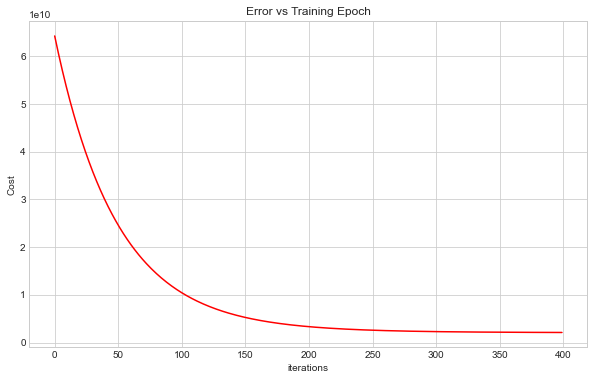

In [25]:
fig, ax = plt.subplots(figsize = (10, 6))
ax.plot(cost_values, '-', c = "red")
ax.set_xlabel('iterations')
ax.set_ylabel('Cost')
ax.set_title("Error vs Training Epoch")
plt.show()

In [26]:
mu[0]

2000.6808510638298

In [27]:
sigma[0]

786.2026187430467

In [29]:
temp = np.array([[1, 1650, 3]], dtype = 'f')
a = (temp[0][1] - mu[0])/sigma[0]
b = (temp[0][2] - mu[1])/sigma[1]
temp[0, 1] = a
temp[0, 2 ] = b
a, b

(-0.4460438603276164, -0.2260933675776883)

In [30]:
temp

array([[ 1.        , -0.44604385, -0.22609337]], dtype=float32)

In [31]:
temp[0][1] - mu[0]/ sigma[0]

-2.990783339000278